In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surabhidubey25","key":"1eeb2895b73edd43095c4e4c7883e627"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pip install -q kaggle

In [7]:
!kaggle datasets download -d orvile/wesad-wearable-stress-affect-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/orvile/wesad-wearable-stress-affect-detection-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 2.41G/2.43G [00:14<00:00, 256MB/s]
100% 2.43G/2.43G [00:14<00:00, 183MB/s]


In [8]:
import zipfile
import os

zip_path = '/content/wesad-wearable-stress-affect-detection-dataset.zip'
extract_path = '/content/wesad_extracted'


os.makedirs(extract_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")


print("\nContents of extracted directory:")
for item in os.listdir(extract_path):
    print(f"- {item}")

Dataset extracted to: /content/wesad_extracted

Contents of extracted directory:
- WESAD


In [9]:
import os

data_path = '/content/wesad_extracted/WESAD'

print(f"Files in the data directory: {data_path}")
for item in os.listdir(data_path):
    print(f"- {item}")

Files in the data directory: /content/wesad_extracted/WESAD
- S10
- S16
- S14
- S3
- S8
- S11
- S9
- S5
- S4
- S13
- wesad_readme.pdf
- S2
- S7
- S6
- S17
- S15


In [10]:
import pickle
import os

data_path = '/content/wesad_extracted/WESAD'
subject_id = 'S2'
subject_file = os.path.join(data_path, subject_id, f'{subject_id}.pkl')

if os.path.exists(subject_file):
    with open(subject_file, 'rb') as f:
        subject_data = pickle.load(f, encoding='latin1')

    print(f"Content of {subject_file}:")

    if isinstance(subject_data, dict):
        print("Keys in the data:", subject_data.keys())

    else:
        print(subject_data)

else:
    print(f"File not found: {subject_file}")

Content of /content/wesad_extracted/WESAD/S2/S2.pkl:
Keys in the data: dict_keys(['signal', 'label', 'subject'])


In [11]:
import pandas as pd

if isinstance(subject_data, dict) and 'signal' in subject_data and 'wrist' in subject_data['signal']:
    wrist_data = subject_data['signal']['wrist']

    if 'ACC' in wrist_data and wrist_data['ACC'].shape[1] == 3:
        acc_df = pd.DataFrame(wrist_data['ACC'], columns=['ACC_x', 'ACC_y', 'ACC_z'])
        print("\nACC sensor data as a DataFrame:")
        display(acc_df.head())
    elif 'ACC' in wrist_data:
         print(f"Warning: Unexpected shape for ACC data: {wrist_data['ACC'].shape}. Cannot create DataFrame with expected columns.")

         acc_df = pd.DataFrame(wrist_data['ACC'])
         print("\nACC sensor data as a DataFrame (generic columns):")
         display(acc_df.head())



    if 'BVP' in wrist_data:

        bvp_data = wrist_data['BVP'].flatten() if wrist_data['BVP'].ndim == 2 else wrist_data['BVP']
        bvp_df = pd.DataFrame(bvp_data, columns=['BVP'])
        print("\nBVP sensor data as a DataFrame:")
        display(bvp_df.head())


    if 'EDA' in wrist_data:

        eda_data = wrist_data['EDA'].flatten() if wrist_data['EDA'].ndim == 2 else wrist_data['EDA']
        eda_df = pd.DataFrame(eda_data, columns=['EDA'])
        print("\nEDA sensor data as a DataFrame:")
        display(eda_df.head())

    if 'TEMP' in wrist_data:

        temp_data = wrist_data['TEMP'].flatten() if wrist_data['TEMP'].ndim == 2 else wrist_data['TEMP']
        temp_df = pd.DataFrame(temp_data, columns=['TEMP'])
        print("\nTEMP sensor data as a DataFrame:")
        display(temp_df.head())

else:
    print("Could not find 'wrist' data in the loaded object.")


ACC sensor data as a DataFrame:


,ACC_x,ACC_y,ACC_z
0,62.0,-21.0,107.0
1,66.0,13.0,53.0
2,41.0,9.0,15.0
3,52.0,16.0,24.0
4,54.0,15.0,34.0



BVP sensor data as a DataFrame:


,BVP
0,-59.37
1,-53.42
2,-44.40
3,-33.17
4,-20.79



EDA sensor data as a DataFrame:


,EDA
0,1.138257
1,1.125444
2,1.011405
3,1.033188
4,0.935807



TEMP sensor data as a DataFrame:


,TEMP
0,35.41
1,35.41
2,35.41
3,35.41
4,35.41


In [12]:
import pandas as pd
import numpy as np

if isinstance(subject_data, dict) and 'signal' in subject_data and 'chest' in subject_data['signal']:
    chest_data = subject_data['signal']['chest']

    print("Structure of chest_data:")
    for key, value in chest_data.items():
        print(f"- {key}: shape {value.shape}, dtype {value.dtype}")


    chest_dfs = {}
    for key, value in chest_data.items():
        try:
            if value.ndim == 2:
                if value.shape[1] > 1:
                    columns = [f'{key}_{i}' for i in range(value.shape[1])]
                    chest_dfs[key] = pd.DataFrame(value, columns=columns)
                else:
                     chest_dfs[key] = pd.DataFrame(value.flatten(), columns=[key])
            elif value.ndim == 1:

                chest_dfs[key] = pd.DataFrame(value, columns=[key])
            else:
                print(f"Warning: Unexpected dimensions for {key} data: {value.ndim}")
                continue

            print(f"\n{key} sensor data as a DataFrame:")
            display(chest_dfs[key].head())

        except Exception as e:
            print(f"Error creating DataFrame for {key}: {e}")

else:
    print("Could not find 'chest' data in the loaded object.")


Structure of chest_data:
- ACC: shape (4255300, 3), dtype float64
- ECG: shape (4255300, 1), dtype float64
- EMG: shape (4255300, 1), dtype float64
- EDA: shape (4255300, 1), dtype float64
- Temp: shape (4255300, 1), dtype float32
- Resp: shape (4255300, 1), dtype float64

ACC sensor data as a DataFrame:


,ACC_0,ACC_1,ACC_2
0,0.9554,-0.2220,-0.5580
1,0.9258,-0.2216,-0.5538
2,0.9082,-0.2196,-0.5392
3,0.8974,-0.2102,-0.5122
4,0.8882,-0.2036,-0.4824



ECG sensor data as a DataFrame:


,ECG
0,0.021423
1,0.020325
2,0.016525
3,0.016708
4,0.011673



EMG sensor data as a DataFrame:


,EMG
0,-0.004440
1,0.004349
2,0.005173
3,0.007187
4,-0.015152



EDA sensor data as a DataFrame:


,EDA
0,5.250549
1,5.267334
2,5.243301
3,5.249405
4,5.286407



Temp sensor data as a DataFrame:


,Temp
0,30.120758
1,30.129517
2,30.138214
3,30.129517
4,30.130951



Resp sensor data as a DataFrame:


,Resp
0,-1.148987
1,-1.124573
2,-1.152039
3,-1.158142
4,-1.161194


In [13]:
def explore_structure(data, indent=0):
    """Recursively explores the structure of nested data."""
    if isinstance(data, dict):
        for key, value in data.items():
            print('  ' * indent + f"Key: {key}, Type: {type(value)}")
            explore_structure(value, indent + 1)
    elif isinstance(data, list):
        print('  ' * indent + f"Type: list, Length: {len(data)}")
        if len(data) > 0:

            print('  ' * (indent + 1) + "Exploring first element:")
            explore_structure(data[0], indent + 2)
    elif isinstance(data, np.ndarray):
        print('  ' * indent + f"Type: np.ndarray, Shape: {data.shape}, Dtype: {data.dtype}")
    else:
        print('  ' * indent + f"Type: {type(data)}")

print("Exploring the structure of subject_data:")
explore_structure(subject_data)

Exploring the structure of subject_data:
Key: signal, Type: <class 'dict'>
  Key: chest, Type: <class 'dict'>
    Key: ACC, Type: <class 'numpy.ndarray'>
      Type: np.ndarray, Shape: (4255300, 3), Dtype: float64
    Key: ECG, Type: <class 'numpy.ndarray'>
      Type: np.ndarray, Shape: (4255300, 1), Dtype: float64
    Key: EMG, Type: <class 'numpy.ndarray'>
      Type: np.ndarray, Shape: (4255300, 1), Dtype: float64
    Key: EDA, Type: <class 'numpy.ndarray'>
      Type: np.ndarray, Shape: (4255300, 1), Dtype: float64
    Key: Temp, Type: <class 'numpy.ndarray'>
      Type: np.ndarray, Shape: (4255300, 1), Dtype: float32
    Key: Resp, Type: <class 'numpy.ndarray'>
      Type: np.ndarray, Shape: (4255300, 1), Dtype: float64
  Key: wrist, Type: <class 'dict'>
    Key: ACC, Type: <class 'numpy.ndarray'>
      Type: np.ndarray, Shape: (194528, 3), Dtype: float64
    Key: BVP, Type: <class 'numpy.ndarray'>
      Type: np.ndarray, Shape: (389056, 1), Dtype: float64
    Key: EDA, Type: <cl

In [14]:
import pandas as pd
import numpy as np
from scipy.signal import resample

target_freq = 64 # Hz


original_freqs = {
    'chest_ACC': 700,
    'chest_ECG': 700,
    'chest_EMG': 700,
    'chest_EDA': 700,
    'chest_Temp': 700,
    'chest_Resp': 700,
    'wrist_ACC': 32,
    'wrist_BVP': 64,
    'wrist_EDA': 4,
    'wrist_TEMP': 4
}


resampled_dfs = {}


wrist_dfs = {
    'wrist_ACC': acc_df,
    'wrist_BVP': bvp_df,
    'wrist_EDA': eda_df,
    'wrist_TEMP': temp_df
}

print("Resampling wrist sensor data to 64 Hz:")
for sensor_name, df in wrist_dfs.items():
    original_freq = original_freqs[sensor_name]
    if original_freq != target_freq:

        num_original_samples = len(df)
        duration = num_original_samples / original_freq
        num_target_samples = int(duration * target_freq)


        resampled_data = {}
        for col in df.columns:
            resampled_data[col] = resample(df[col], num_target_samples)

        resampled_dfs[sensor_name] = pd.DataFrame(resampled_data, columns=df.columns)
        print(f"- Resampled {sensor_name} from {original_freq} Hz to {target_freq} Hz. Original shape: {df.shape}, Resampled shape: {resampled_dfs[sensor_name].shape}")
    else:
        resampled_dfs[sensor_name] = df
        print(f"- {sensor_name} is already at {target_freq} Hz. Shape: {df.shape}")

chest_sensor_map = {
    'ACC': 'chest_ACC',
    'ECG': 'chest_ECG',
    'EMG': 'chest_EMG',
    'EDA': 'chest_EDA',
    'Temp': 'chest_Temp',
    'Resp': 'chest_Resp'
}

print("\nResampling chest sensor data to 64 Hz:")
if 'chest_dfs' in locals():
    for sensor_key, df in chest_dfs.items():
        if sensor_key in chest_sensor_map:
            sensor_name = chest_sensor_map[sensor_key]
            original_freq = original_freqs[sensor_name]
            if original_freq != target_freq:

                num_original_samples = len(df)
                duration = num_original_samples / original_freq
                num_target_samples = int(duration * target_freq)


                resampled_data = {}
                for col in df.columns:
                    resampled_data[col] = resample(df[col], num_target_samples)

                resampled_dfs[sensor_name] = pd.DataFrame(resampled_data, columns=df.columns)
                print(f"- Resampled {sensor_name} from {original_freq} Hz to {target_freq} Hz. Original shape: {df.shape}, Resampled shape: {resampled_dfs[sensor_name].shape}")
            else:
                resampled_dfs[sensor_name] = df
                print(f"- {sensor_name} is already at {target_freq} Hz. Shape: {df.shape}")
        else:
             print(f"Warning: Skipping unknown chest sensor key: {sensor_key}")

else:
    print("Chest DataFrames (chest_dfs) not found. Please ensure the cell to create them has been run.")


print("\nExample of resampled wrist ACC data:")
if 'wrist_ACC' in resampled_dfs:
    display(resampled_dfs['wrist_ACC'].head())

print("\nExample of resampled chest ECG data:")
if 'chest_ECG' in resampled_dfs:
    display(resampled_dfs['chest_ECG'].head())

Resampling wrist sensor data to 64 Hz:
- Resampled wrist_ACC from 32 Hz to 64 Hz. Original shape: (194528, 3), Resampled shape: (389056, 3)
- wrist_BVP is already at 64 Hz. Shape: (389056, 1)
- Resampled wrist_EDA from 4 Hz to 64 Hz. Original shape: (24316, 1), Resampled shape: (389056, 1)
- Resampled wrist_TEMP from 4 Hz to 64 Hz. Original shape: (24316, 1), Resampled shape: (389056, 1)

Resampling chest sensor data to 64 Hz:
- Resampled chest_ACC from 700 Hz to 64 Hz. Original shape: (4255300, 3), Resampled shape: (389056, 3)
- Resampled chest_ECG from 700 Hz to 64 Hz. Original shape: (4255300, 1), Resampled shape: (389056, 1)
- Resampled chest_EMG from 700 Hz to 64 Hz. Original shape: (4255300, 1), Resampled shape: (389056, 1)
- Resampled chest_EDA from 700 Hz to 64 Hz. Original shape: (4255300, 1), Resampled shape: (389056, 1)
- Resampled chest_Temp from 700 Hz to 64 Hz. Original shape: (4255300, 1), Resampled shape: (389056, 1)
- Resampled chest_Resp from 700 Hz to 64 Hz. Original

,ACC_x,ACC_y,ACC_z
0,62.000000,-21.000000,107.000000
1,66.111191,-9.448018,102.395428
2,66.000000,13.000000,53.000000
3,54.773562,18.437849,15.665055
4,41.000000,9.000000,15.000000



Example of resampled chest ECG data:


,ECG
0,0.004683
1,0.000069
2,-0.009166
3,0.046841
4,0.061593


In [15]:
from scipy.signal import butter, filtfilt

def apply_filter(data, lowcut, highcut, fs, order, filter_type):
    nyquist = 0.5 * fs
    low = lowcut / nyquist if lowcut is not None else None
    high = highcut / nyquist if highcut is not None else None


    if low is not None and (low < 0 or low >= 1):
         raise ValueError(f"Normalized lowcut frequency ({low}) is out of valid range [0, 1). Original lowcut: {lowcut} Hz, Nyquist: {nyquist} Hz")
    if high is not None and (high <= 0 or high >= 1):
         raise ValueError(f"Normalized highcut frequency ({high}) is out of valid range (0, 1). Original highcut: {highcut} Hz, Nyquist: {nyquist} Hz")
    if low is not None and high is not None and low >= high:
         raise ValueError(f"Normalized lowcut frequency ({low}) must be less than normalized highcut frequency ({high})")


    if filter_type == 'lowpass':
        b, a = butter(order, high, btype=filter_type)
    elif filter_type == 'highpass':
        b, a = butter(order, low, btype=filter_type)
    elif filter_type == 'bandpass':

        b, a = butter(order, [low, high], btype=filter_type)
    else:
        raise ValueError("Invalid filter_type. Choose 'lowpass', 'highpass', or 'bandpass'.")


    if data.ndim == 1:
        filtered_data = filtfilt(b, a, data)
    elif data.ndim == 2:
        filtered_data = np.zeros_like(data)
        for i in range(data.shape[1]):
            filtered_data[:, i] = filtfilt(b, a, data[:, i])
    else:
        raise ValueError("Data must be 1D or 2D.")

    return filtered_data


filtered_dfs = {}

print("Applying filters to resampled sensor data (64 Hz):")


if 'wrist_ACC' in resampled_dfs:

    filtered_dfs['wrist_ACC'] = pd.DataFrame(apply_filter(resampled_dfs['wrist_ACC'].values, None, 10, target_freq, 4, 'lowpass'), columns=resampled_dfs['wrist_ACC'].columns)
    print("- Applied low-pass filter to wrist_ACC")

if 'wrist_BVP' in resampled_dfs:

    filtered_dfs['wrist_BVP'] = pd.DataFrame(apply_filter(resampled_dfs['wrist_BVP'].values, 0.5, 8, target_freq, 4, 'bandpass'), columns=resampled_dfs['wrist_BVP'].columns)
    print("- Applied band-pass filter to wrist_BVP")

if 'wrist_EDA' in resampled_dfs:

    filtered_dfs['wrist_EDA'] = pd.DataFrame(apply_filter(resampled_dfs['wrist_EDA'].values, None, 1, target_freq, 4, 'lowpass'), columns=resampled_dfs['wrist_EDA'].columns)
    print("- Applied low-pass filter to wrist_EDA")

if 'wrist_TEMP' in resampled_dfs:

    filtered_dfs['wrist_TEMP'] = pd.DataFrame(apply_filter(resampled_dfs['wrist_TEMP'].values, None, 0.1, target_freq, 4, 'lowpass'), columns=resampled_dfs['wrist_TEMP'].columns)
    print("- Applied low-pass filter to wrist_TEMP")


if 'chest_ACC' in resampled_dfs:

    filtered_dfs['chest_ACC'] = pd.DataFrame(apply_filter(resampled_dfs['chest_ACC'].values, None, 10, target_freq, 4, 'lowpass'), columns=resampled_dfs['chest_ACC'].columns)
    print("- Applied low-pass filter to chest_ACC")

if 'chest_ECG' in resampled_dfs:

    filtered_dfs['chest_ECG'] = pd.DataFrame(apply_filter(resampled_dfs['chest_ECG'].values, 0.5, 30, target_freq, 4, 'bandpass'), columns=resampled_dfs['chest_ECG'].columns)
    print("- Applied band-pass filter to chest_ECG")

if 'chest_EMG' in resampled_dfs:

    filtered_dfs['chest_EMG'] = pd.DataFrame(apply_filter(resampled_dfs['chest_EMG'].values, 10, 30, target_freq, 4, 'bandpass'), columns=resampled_dfs['chest_EMG'].columns)
    print("- Applied band-pass filter to chest_EMG")


if 'chest_EDA' in resampled_dfs:

    filtered_dfs['chest_EDA'] = pd.DataFrame(apply_filter(resampled_dfs['chest_EDA'].values, None, 1, target_freq, 4, 'lowpass'), columns=resampled_dfs['chest_EDA'].columns)
    print("- Applied low-pass filter to chest_EDA")

if 'chest_Temp' in resampled_dfs:

    filtered_dfs['chest_Temp'] = pd.DataFrame(apply_filter(resampled_dfs['chest_Temp'].values, None, 0.1, target_freq, 4, 'lowpass'), columns=resampled_dfs['chest_Temp'].columns)
    print("- Applied low-pass filter to chest_Temp")

if 'chest_Resp' in resampled_dfs:

    filtered_dfs['chest_Resp'] = pd.DataFrame(apply_filter(resampled_dfs['chest_Resp'].values, None, 0.5, target_freq, 4, 'lowpass'), columns=resampled_dfs['chest_Resp'].columns)
    print("- Applied low-pass filter to chest_Resp")


print("\nExample of filtered wrist BVP data:")
if 'wrist_BVP' in filtered_dfs:
    display(filtered_dfs['wrist_BVP'].head())

print("\nExample of filtered chest ECG data:")
if 'chest_ECG' in filtered_dfs:
    display(filtered_dfs['chest_ECG'].head())

Applying filters to resampled sensor data (64 Hz):
- Applied low-pass filter to wrist_ACC
- Applied band-pass filter to wrist_BVP
- Applied low-pass filter to wrist_EDA
- Applied low-pass filter to wrist_TEMP
- Applied low-pass filter to chest_ACC
- Applied band-pass filter to chest_ECG
- Applied band-pass filter to chest_EMG
- Applied low-pass filter to chest_EDA
- Applied low-pass filter to chest_Temp
- Applied low-pass filter to chest_Resp

Example of filtered wrist BVP data:


,BVP
0,-6.541093
1,-1.493596
2,4.529272
3,12.055225
4,20.999747



Example of filtered chest ECG data:


,ECG
0,-0.037190
1,-0.039776
2,-0.046410
3,0.010390
4,0.028860


In [16]:
window_size_sec = 60
overlap_sec = 0


window_size_samples = int(window_size_sec * target_freq)
overlap_samples = int(overlap_sec * target_freq)
step_size_samples = window_size_samples - overlap_samples

segmented_data = {}

print(f"Segmenting data into {window_size_sec}-second non-overlapping windows ({window_size_samples} samples per window):")


for sensor_name, df in filtered_dfs.items():
    segments = []
    num_samples = len(df)


    for start_sample in range(0, num_samples - window_size_samples + 1, step_size_samples):
        end_sample = start_sample + window_size_samples
        segment = df.iloc[start_sample:end_sample]
        segments.append(segment)

    segmented_data[sensor_name] = segments
    print(f"- Segmented {sensor_name}: Created {len(segments)} segments of shape {window_size_samples}x{df.shape[1]}")


print("\nExample: Shape of the first segment of wrist_ACC data:")
if 'wrist_ACC' in segmented_data and len(segmented_data['wrist_ACC']) > 0:
    print(segmented_data['wrist_ACC'][0].shape)
else:
    print("No segments created for wrist_ACC.")

print("\nExample: Shape of the first segment of chest_ECG data:")
if 'chest_ECG' in segmented_data and len(segmented_data['chest_ECG']) > 0:
    print(segmented_data['chest_ECG'][0].shape)
else:
    print("No segments created for chest_ECG.")

Segmenting data into 60-second non-overlapping windows (3840 samples per window):
- Segmented wrist_ACC: Created 101 segments of shape 3840x3
- Segmented wrist_BVP: Created 101 segments of shape 3840x1
- Segmented wrist_EDA: Created 101 segments of shape 3840x1
- Segmented wrist_TEMP: Created 101 segments of shape 3840x1
- Segmented chest_ACC: Created 101 segments of shape 3840x3
- Segmented chest_ECG: Created 101 segments of shape 3840x1
- Segmented chest_EMG: Created 101 segments of shape 3840x1
- Segmented chest_EDA: Created 101 segments of shape 3840x1
- Segmented chest_Temp: Created 101 segments of shape 3840x1
- Segmented chest_Resp: Created 101 segments of shape 3840x1

Example: Shape of the first segment of wrist_ACC data:
(3840, 3)

Example: Shape of the first segment of chest_ECG data:
(3840, 1)


In [17]:
import numpy as np
import pandas as pd


extracted_features = {}

print("Extracting time-domain features from each segment:")


for sensor_name, segments in segmented_data.items():
    sensor_features = []
    print(f"- Processing {sensor_name} ({len(segments)} segments)")

    for segment in segments:
        features = {}

        for col in segment.columns:
            features[f'{col}_mean'] = segment[col].mean()
            features[f'{col}_std'] = segment[col].std()
            features[f'{col}_min'] = segment[col].min()
            features[f'{col}_max'] = segment[col].max()
            features[f'{col}_range'] = segment[col].max() - segment[col].min()
            features[f'{col}_median'] = segment[col].median()
            features[f'{col}_variance'] = segment[col].var()

        sensor_features.append(features)

    extracted_features[sensor_name] = pd.DataFrame(sensor_features)
    print(f"  Extracted features for {sensor_name}: shape {extracted_features[sensor_name].shape}")



print("\nExample of extracted features for wrist_ACC:")
if 'wrist_ACC' in extracted_features and not extracted_features['wrist_ACC'].empty:
    display(extracted_features['wrist_ACC'].head())
else:
    print("No features extracted for wrist_ACC.")

print("\nExample of extracted features for chest_ECG:")
if 'chest_ECG' in extracted_features and not extracted_features['chest_ECG'].empty:
     display(extracted_features['chest_ECG'].head())
else:
    print("No features extracted for chest_ECG.")


Extracting time-domain features from each segment:
- Processing wrist_ACC (101 segments)
  Extracted features for wrist_ACC: shape (101, 21)
- Processing wrist_BVP (101 segments)
  Extracted features for wrist_BVP: shape (101, 7)
- Processing wrist_EDA (101 segments)
  Extracted features for wrist_EDA: shape (101, 7)
- Processing wrist_TEMP (101 segments)
  Extracted features for wrist_TEMP: shape (101, 7)
- Processing chest_ACC (101 segments)
  Extracted features for chest_ACC: shape (101, 21)
- Processing chest_ECG (101 segments)
  Extracted features for chest_ECG: shape (101, 7)
- Processing chest_EMG (101 segments)
  Extracted features for chest_EMG: shape (101, 7)
- Processing chest_EDA (101 segments)
  Extracted features for chest_EDA: shape (101, 7)
- Processing chest_Temp (101 segments)
  Extracted features for chest_Temp: shape (101, 7)
- Processing chest_Resp (101 segments)
  Extracted features for chest_Resp: shape (101, 7)

Example of extracted features for wrist_ACC:


,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_x_range,ACC_x_median,ACC_x_variance,ACC_y_mean,ACC_y_std,ACC_y_min,...,ACC_y_range,ACC_y_median,ACC_y_variance,ACC_z_mean,ACC_z_std,ACC_z_min,ACC_z_max,ACC_z_range,ACC_z_median,ACC_z_variance
0,27.753318,17.934343,-11.172094,81.640620,92.812713,17.953051,321.640665,-25.635191,39.995971,-81.514682,...,127.950089,-55.342743,1599.677723,18.937089,18.011197,-39.803986,107.000142,146.804128,15.406030,324.403229
1,43.852801,6.974593,15.591693,129.936369,114.344675,44.001034,48.644953,-2.178910,21.151330,-24.096884,...,84.226467,-12.499259,447.378767,36.288083,15.798312,-34.655680,95.720755,130.376435,42.733904,249.586662
2,44.015627,9.240568,-58.910122,110.430231,169.340353,44.605542,85.388098,-9.135518,12.695175,-73.240134,...,124.113960,-11.988739,161.167456,40.478475,12.256623,-33.894928,130.636987,164.531915,42.727075,150.224795
3,37.696364,14.113749,-47.218187,93.838355,141.056542,40.480387,199.197923,3.317307,26.483212,-61.033314,...,112.805449,-9.957078,701.360537,39.449959,14.397728,-29.772764,123.473316,153.246080,41.999657,207.294574
4,54.626497,12.874660,-29.308453,95.948735,125.257188,59.487512,165.756879,-1.240012,17.396458,-20.720938,...,86.690032,-11.124825,302.636755,5.554183,23.894120,-37.972012,120.368382,158.340393,-4.602139,570.928988



Example of extracted features for chest_ECG:


,ECG_mean,ECG_std,ECG_min,ECG_max,ECG_range,ECG_median,ECG_variance
0,0.000082,0.141724,-0.408802,0.791080,1.199882,0.010042,0.020086
1,0.000043,0.127556,-0.447150,0.617357,1.064507,0.015515,0.016270
2,0.000341,0.126805,-0.409682,0.659691,1.069373,0.016491,0.016079
3,-0.000376,0.121017,-0.312709,0.675670,0.988380,0.011934,0.014645
4,-0.000083,0.126440,-0.301528,0.684024,0.985552,0.012343,0.015987


In [18]:
from scipy.fft import fft
import numpy as np


frequency_features = {}

print("\nExtracting frequency-domain features from each segment:")


for sensor_name, segments in segmented_data.items():
    sensor_freq_features = []
    print(f"- Processing {sensor_name} ({len(segments)} segments for frequency features)")


    for segment in segments:
        freq_features = {}

        for col in segment.columns:
            signal = segment[col].values
            N = len(signal)

            yf = fft(signal)

            xf = np.linspace(0.0, target_freq/2.0, N//2)


            power_spectrum = 2.0/N * np.abs(yf[0:N//2])**2


            freq_features[f'{col}_total_power'] = np.sum(power_spectrum)


            low_freq_band = (xf >= 0.1) & (xf < 1.0)
            freq_features[f'{col}_power_0.1-1Hz'] = np.sum(power_spectrum[low_freq_band])


            high_freq_band = (xf >= 1.0) & (xf < 10.0)
            freq_features[f'{col}_power_1-10Hz'] = np.sum(power_spectrum[high_freq_band])



        sensor_freq_features.append(freq_features)


    frequency_features[sensor_name] = pd.DataFrame(sensor_freq_features)
    print(f"  Extracted frequency features for {sensor_name}: shape {frequency_features[sensor_name].shape}")


print("\nExample of extracted frequency features for wrist_BVP:")
if 'wrist_BVP' in frequency_features and not frequency_features['wrist_BVP'].empty:
    display(frequency_features['wrist_BVP'].head())
else:
    print("No frequency features extracted for wrist_BVP.")

print("\nExample of extracted frequency features for chest_ECG:")
if 'chest_ECG' in frequency_features and not frequency_features['chest_ECG'].empty:
    display(frequency_features['chest_ECG'].head())
else:
    print("No frequency features extracted for chest_ECG.")


Extracting frequency-domain features from each segment:
- Processing wrist_ACC (101 segments for frequency features)
  Extracted frequency features for wrist_ACC: shape (101, 9)
- Processing wrist_BVP (101 segments for frequency features)
  Extracted frequency features for wrist_BVP: shape (101, 3)
- Processing wrist_EDA (101 segments for frequency features)
  Extracted frequency features for wrist_EDA: shape (101, 3)
- Processing wrist_TEMP (101 segments for frequency features)
  Extracted frequency features for wrist_TEMP: shape (101, 3)
- Processing chest_ACC (101 segments for frequency features)
  Extracted frequency features for chest_ACC: shape (101, 9)
- Processing chest_ECG (101 segments for frequency features)
  Extracted frequency features for chest_ECG: shape (101, 3)
- Processing chest_EMG (101 segments for frequency features)
  Extracted frequency features for chest_EMG: shape (101, 3)
- Processing chest_EDA (101 segments for frequency features)
  Extracted frequency feat

,BVP_total_power,BVP_power_0.1-1Hz,BVP_power_1-10Hz
0,2.081638e+07,7.959675e+06,1.285128e+07
1,4.055348e+06,8.809646e+05,3.174328e+06
2,1.718833e+07,3.433698e+06,1.375336e+07
3,2.440661e+07,4.620801e+06,1.978566e+07
4,2.700376e+07,8.682483e+06,1.831177e+07



Example of extracted frequency features for chest_ECG:


,ECG_total_power,ECG_power_0.1-1Hz,ECG_power_1-10Hz
0,77.108921,1.878004,62.922379
1,62.462328,0.531748,53.649240
2,61.729876,0.742589,52.790855
3,56.223466,0.894251,47.744823
4,61.374166,2.410959,51.068138


In [19]:
from scipy.signal import find_peaks
import numpy as np
import pandas as pd


physiological_features = {}

print("\nExtracting physiological features (Heart Rate) from BVP segments:")

if 'wrist_BVP' in segmented_data:
    bvp_segments = segmented_data['wrist_BVP']
    hr_features = []

    print(f"- Processing wrist_BVP ({len(bvp_segments)} segments)")

    for i, segment in enumerate(bvp_segments):
        segment_data = segment['BVP'].values
        features = {}


        min_peak_distance = int(target_freq / 3)


        peaks, _ = find_peaks(segment_data, distance=min_peak_distance)

        if len(peaks) > 1:

            ibi_samples = np.diff(peaks)


            ibi_seconds = ibi_samples / target_freq


            mean_ibi_seconds = np.mean(ibi_seconds)
            features['BVP_mean_HR'] = 60 / mean_ibi_seconds if mean_ibi_seconds > 0 else np.nan


            if len(ibi_seconds) > 1:
                 ibi_diff = np.diff(ibi_seconds)
                 features['BVP_RMSSD'] = np.sqrt(np.mean(ibi_diff**2))
            else:
                 features['BVP_RMSSD'] = np.nan #


        else:

            features['BVP_mean_HR'] = np.nan
            features['BVP_RMSSD'] = np.nan

        hr_features.append(features)

    physiological_features['wrist_BVP_HRV'] = pd.DataFrame(hr_features)
    print(f"  Extracted HR/HRV features for wrist_BVP: shape {physiological_features['wrist_BVP_HRV'].shape}")

else:
    print("Wrist BVP segmented data not found.")



print("\nExample of extracted wrist BVP HR/HRV features:")
if 'wrist_BVP_HRV' in physiological_features and not physiological_features['wrist_BVP_HRV'].empty:
    display(physiological_features['wrist_BVP_HRV'].head())
else:
    print("No HR/HRV features extracted for wrist_BVP.")


Extracting physiological features (Heart Rate) from BVP segments:
- Processing wrist_BVP (101 segments)
  Extracted HR/HRV features for wrist_BVP: shape (101, 2)

Example of extracted wrist BVP HR/HRV features:


,BVP_mean_HR,BVP_RMSSD
0,90.566038,0.226870
1,83.059879,0.205720
2,86.450262,0.200864
3,87.547170,0.245092
4,102.560880,0.246181


In [20]:
import pandas as pd
import numpy as np


eda_physiological_features = {}

print("\nExtracting basic physiological features (statistics) from EDA segments:")


if 'wrist_EDA' in segmented_data:
    eda_segments = segmented_data['wrist_EDA']
    wrist_eda_features = []
    print(f"- Processing wrist_EDA ({len(eda_segments)} segments)")
    for segment in eda_segments:
        features = {}

        if 'EDA' in segment.columns:
            features['wrist_EDA_mean'] = segment['EDA'].mean()
            features['wrist_EDA_median'] = segment['EDA'].median()
            features['wrist_EDA_std'] = segment['EDA'].std()
            features['wrist_EDA_min'] = segment['EDA'].min()
            features['wrist_EDA_max'] = segment['EDA'].max()
            features['wrist_EDA_range'] = segment['EDA'].max() - segment['EDA'].min()
        wrist_eda_features.append(features)
    eda_physiological_features['wrist_EDA'] = pd.DataFrame(wrist_eda_features)
    print(f"  Extracted basic EDA features for wrist_EDA: shape {eda_physiological_features['wrist_EDA'].shape}")
else:
    print("Wrist EDA segmented data not found.")


if 'chest_EDA' in segmented_data:
    eda_segments = segmented_data['chest_EDA']
    chest_eda_features = []
    print(f"- Processing chest_EDA ({len(eda_segments)} segments)")
    for segment in eda_segments:
        features = {}

        if 'EDA' in segment.columns:
            features['chest_EDA_mean'] = segment['EDA'].mean()
            features['chest_EDA_median'] = segment['EDA'].median()
            features['chest_EDA_std'] = segment['EDA'].std()
            features['chest_EDA_min'] = segment['EDA'].min()
            features['chest_EDA_max'] = segment['EDA'].max()
            features['chest_EDA_range'] = segment['EDA'].max() - segment['EDA'].min()
        chest_eda_features.append(features)
    eda_physiological_features['chest_EDA'] = pd.DataFrame(chest_eda_features)
    print(f"  Extracted basic EDA features for chest_EDA: shape {eda_physiological_features['chest_EDA'].shape}")
else:
    print("Chest EDA segmented data not found.")



print("\nExample of extracted basic EDA features for wrist_EDA:")
if 'wrist_EDA' in eda_physiological_features and not eda_physiological_features['wrist_EDA'].empty:
    display(eda_physiological_features['wrist_EDA'].head())
else:
    print("No basic EDA features extracted for wrist_EDA.")

print("\nExample of extracted basic EDA features for chest_EDA:")
if 'chest_EDA' in eda_physiological_features and not eda_physiological_features['chest_EDA'].empty:
    display(eda_physiological_features['chest_EDA'].head())
else:
    print("No basic EDA features extracted for chest_EDA.")


Extracting basic physiological features (statistics) from EDA segments:
- Processing wrist_EDA (101 segments)
  Extracted basic EDA features for wrist_EDA: shape (101, 6)
- Processing chest_EDA (101 segments)
  Extracted basic EDA features for chest_EDA: shape (101, 6)

Example of extracted basic EDA features for wrist_EDA:


,wrist_EDA_mean,wrist_EDA_median,wrist_EDA_std,wrist_EDA_min,wrist_EDA_max,wrist_EDA_range
0,1.231999,1.279815,0.100623,0.938617,1.558019,0.619402
1,1.096828,1.107978,0.062987,0.931786,1.239974,0.308189
2,1.030548,1.001930,0.117951,0.850632,1.383941,0.533309
3,1.002259,0.985115,0.083257,0.842019,1.182642,0.340624
4,1.240561,1.259125,0.184551,0.924710,1.711771,0.787061



Example of extracted basic EDA features for chest_EDA:


,chest_EDA_mean,chest_EDA_median,chest_EDA_std,chest_EDA_min,chest_EDA_max,chest_EDA_range
0,5.509957,5.463596,0.285408,3.036524,6.466643,3.430118
1,5.466475,5.360907,0.293483,5.177311,6.489599,1.312288
2,5.667359,5.449140,0.578864,4.991589,6.894129,1.902540
3,5.816713,5.813443,0.364052,5.290620,6.729355,1.438734
4,6.157117,6.051455,0.535017,5.328243,7.479797,2.151554


In [21]:
import pandas as pd
import numpy as np


combined_features = {}


combined_features.update(extracted_features)


for sensor_name, df in frequency_features.items():

    renamed_cols = {col: f'{sensor_name}_{col}' for col in df.columns}
    combined_features[sensor_name] = combined_features[sensor_name].join(df.rename(columns=renamed_cols))



for sensor_name, df in physiological_features.items():

    renamed_cols = {col: f'{sensor_name}_{col}' for col in df.columns}

    if sensor_name in combined_features:
         combined_features[sensor_name] = combined_features[sensor_name].join(df.rename(columns=renamed_cols))
    else:

         combined_features[sensor_name] = df.rename(columns=renamed_cols)


for sensor_name, df in eda_physiological_features.items():
    combined_features[sensor_name] = combined_features[sensor_name].join(df)



all_sensor_features_list = []
sensor_names_order = sorted(combined_features.keys())

if combined_features:

    num_segments = len(list(combined_features.values())[0])
    if all(len(df) == num_segments for df in combined_features.values()):
        for sensor_name in sensor_names_order:
             all_sensor_features_list.append(combined_features[sensor_name])

        final_features_df = pd.concat(all_sensor_features_list, axis=1)
        print("\nCombined features from all sensors:")
        display(final_features_df.head())
        print(f"Shape of combined features DataFrame: {final_features_df.shape}")

    else:
        print("Error: Feature DataFrames for different sensors have different numbers of segments. Cannot concatenate.")

else:
    print("No combined features found.")
    final_features_df = pd.DataFrame()


if 'subject_data' in locals() and 'label' in subject_data:
    original_labels = subject_data['label']
    original_label_freq = original_freqs['chest_ACC']
    target_freq = 64

    segment_labels = []
    window_size_samples_target_freq = int(window_size_sec * target_freq)
    window_size_samples_original_freq = int(window_size_sec * original_label_freq)

    samples_ratio = original_label_freq / target_freq


    if not final_features_df.empty:
        num_segments = len(final_features_df)
        for i in range(num_segments):

            start_sample_target = i * window_size_samples_target_freq
            end_sample_target = start_sample_target + window_size_samples_target_freq


            start_sample_original = int(i * window_size_samples_original_freq)
            end_sample_original = int((i + 1) * window_size_samples_original_freq)



            start_idx = min(start_sample_original, len(original_labels))
            end_idx = min(end_sample_original, len(original_labels))


            if start_idx < end_idx:
                segment_label_window = original_labels[start_idx:end_idx]

                if len(segment_label_window) > 0:

                    values, counts = np.unique(segment_label_window, return_counts=True)
                    mode_label = values[np.argmax(counts)]
                    segment_labels.append(mode_label)
                else:

                     segment_labels.append(np.nan)

            else:

                 segment_labels.append(np.nan)

        final_features_df['label'] = segment_labels

        print("\nCombined features with labels:")
        display(final_features_df.head())
        print(f"Shape of final DataFrame with labels: {final_features_df.shape}")

    else:
         print("\nNo features to align with labels.")


else:
    print("Subject data or labels not found. Cannot align features with labels.")


Combined features from all sensors:


,ACC_0_mean,ACC_0_std,ACC_0_min,ACC_0_max,ACC_0_range,ACC_0_median,ACC_0_variance,ACC_1_mean,ACC_1_std,ACC_1_min,...,TEMP_mean,TEMP_std,TEMP_min,TEMP_max,TEMP_range,TEMP_median,TEMP_variance,wrist_TEMP_TEMP_total_power,wrist_TEMP_TEMP_power_0.1-1Hz,wrist_TEMP_TEMP_power_1-10Hz
0,0.874308,0.043526,0.487797,1.239936,0.752139,0.871831,0.001895,-0.126931,0.059288,-0.440439,...,35.460860,0.041323,35.397213,35.539915,0.142702,35.441282,0.001708,9.657396e+06,0.688575,0.060508
1,0.862138,0.014636,0.744326,1.093320,0.348994,0.861875,0.000214,-0.168819,0.024855,-0.232179,...,35.519323,0.025665,35.491865,35.572272,0.080407,35.509763,0.000659,9.689262e+06,0.016274,0.000795
2,0.864755,0.017735,0.747180,1.015085,0.267904,0.859386,0.000315,-0.172876,0.038332,-0.243999,...,35.670417,0.093711,35.523384,35.820600,0.297215,35.653987,0.008782,9.771902e+06,2.750662,0.243715
3,0.874226,0.014950,0.803731,0.950118,0.146388,0.873416,0.000224,-0.139122,0.050188,-0.245248,...,35.808949,0.012946,35.775798,35.837908,0.062110,35.809275,0.000168,9.847917e+06,0.035344,0.003499
4,0.865411,0.018701,0.779682,0.954836,0.175154,0.864780,0.000350,-0.150565,0.036497,-0.243018,...,35.791271,0.015885,35.762485,35.820683,0.058198,35.787254,0.000252,9.838197e+06,0.072154,0.005724


Shape of combined features DataFrame: (101, 154)

Combined features with labels:


,ACC_0_mean,ACC_0_std,ACC_0_min,ACC_0_max,ACC_0_range,ACC_0_median,ACC_0_variance,ACC_1_mean,ACC_1_std,ACC_1_min,...,TEMP_std,TEMP_min,TEMP_max,TEMP_range,TEMP_median,TEMP_variance,wrist_TEMP_TEMP_total_power,wrist_TEMP_TEMP_power_0.1-1Hz,wrist_TEMP_TEMP_power_1-10Hz,label
0,0.874308,0.043526,0.487797,1.239936,0.752139,0.871831,0.001895,-0.126931,0.059288,-0.440439,...,0.041323,35.397213,35.539915,0.142702,35.441282,0.001708,9.657396e+06,0.688575,0.060508,0
1,0.862138,0.014636,0.744326,1.093320,0.348994,0.861875,0.000214,-0.168819,0.024855,-0.232179,...,0.025665,35.491865,35.572272,0.080407,35.509763,0.000659,9.689262e+06,0.016274,0.000795,0
2,0.864755,0.017735,0.747180,1.015085,0.267904,0.859386,0.000315,-0.172876,0.038332,-0.243999,...,0.093711,35.523384,35.820600,0.297215,35.653987,0.008782,9.771902e+06,2.750662,0.243715,0
3,0.874226,0.014950,0.803731,0.950118,0.146388,0.873416,0.000224,-0.139122,0.050188,-0.245248,...,0.012946,35.775798,35.837908,0.062110,35.809275,0.000168,9.847917e+06,0.035344,0.003499,0
4,0.865411,0.018701,0.779682,0.954836,0.175154,0.864780,0.000350,-0.150565,0.036497,-0.243018,...,0.015885,35.762485,35.820683,0.058198,35.787254,0.000252,9.838197e+06,0.072154,0.005724,0


Shape of final DataFrame with labels: (101, 155)


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:
class ECG_LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2):
        super(ECG_LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 64)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Take the last time step
        return self.fc(out)


In [24]:
class EDA_CNN(nn.Module):
    def __init__(self):
        super(EDA_CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 14, 64)  # Adjust based on input size

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        return self.fc1(x)


In [25]:
class Temp_MLP(nn.Module):
    def __init__(self, input_size=60):
        super(Temp_MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)


In [26]:
# ECG: (batch, time_steps, 1)
# EDA: (batch, 1, signal_length)
# Temp: (batch, signal_length)
ecg_model = ECG_LSTM()
eda_model = EDA_CNN()
temp_model = Temp_MLP(input_size=60)

In [27]:
print(ecg_model)
print(eda_model)
print(temp_model)

ECG_LSTM(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=64, bias=True)
)
EDA_CNN(
  (conv1): Conv1d(1, 16, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,))
  (fc1): Linear(in_features=448, out_features=64, bias=True)
)
Temp_MLP(
  (fc1): Linear(in_features=60, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
)


In [28]:
class EnhancedAttentionFusion(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=32, num_modalities=3):
        super(EnhancedAttentionFusion, self).__init__()
        self.attn_mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, modality_outputs):
        """
        modality_outputs: list of tensors [batch_size, input_dim] for each modality
        returns: fused tensor of shape [batch_size, input_dim]
        """
        # Stack into shape [batch, modalities, dim]
        stacked = torch.stack(modality_outputs, dim=1)  # [B, M, D]

        # Flatten for MLP: [B*M, D]
        B, M, D = stacked.shape
        flat = stacked.view(-1, D)

        # Compute attention weights via MLP
        attn_raw = self.attn_mlp(flat)  # [B*M, 1]
        attn_raw = attn_raw.view(B, M, 1)  # [B, M, 1]

        # Normalize via softmax
        attn_weights = torch.softmax(attn_raw, dim=1)  # [B, M, 1]

        # Weighted sum
        fused = (stacked * attn_weights).sum(dim=1)  # [B, D]
        return fused


In [29]:
# Instantiate fusion layer
fusion_layer = EnhancedAttentionFusion()

# Example modality outputs (batch of 8)
ecg_out = torch.randn(8, 64)
eda_out = torch.randn(8, 64)
temp_out = torch.randn(8, 64)

# Fuse them
fused_output = fusion_layer([ecg_out, eda_out, temp_out])
print("Fused output shape:", fused_output.shape)  # → [8, 64]


Fused output shape: torch.Size([8, 64])


In [30]:
class StressClassifier(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=32, output_dim=1, multi_class=False):
        super(StressClassifier, self).__init__()
        self.multi_class = multi_class
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        out = self.net(x)
        if self.multi_class:
            return torch.softmax(out, dim=1)  # For 3-class emotion classification
        else:
            return torch.sigmoid(out)         # For binary classification


In [31]:
# For binary classification
binary_classifier = StressClassifier(input_dim=64, output_dim=1, multi_class=False)

# Dummy fused output
fused = torch.randn(8, 64)
binary_output = binary_classifier(fused)
print("Binary classification output shape:", binary_output.shape)  # [8, 1]


Binary classification output shape: torch.Size([8, 1])


In [32]:
# For 3-class classification: Baseline, Amusement, Stress
multi_classifier = StressClassifier(input_dim=64, output_dim=3, multi_class=True)

# Dummy fused output
fused = torch.randn(8, 64)
multi_output = multi_classifier(fused)
print("Multi-class output shape:", multi_output.shape)  # [8, 3]


Multi-class output shape: torch.Size([8, 3])


In [33]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

# Dummy data — replace with actual fused output
torch.manual_seed(42)
fused_data = torch.randn(500, 128)  # 500 samples, 128 features
binary_labels = torch.randint(0, 2, (500, 1)).float()

# Dataset and Dataloaders
dataset = TensorDataset(fused_data, binary_labels)
train_set, val_set = random_split(dataset, [400, 100])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

# Binary classification model
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=10):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(train_loader):.4f}")

# Run training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BinaryClassifier(input_dim=fused_data.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, val_loader, criterion, optimizer, device)


Epoch 1/10 | Loss: 0.6922
Epoch 2/10 | Loss: 0.6728
Epoch 3/10 | Loss: 0.6532
Epoch 4/10 | Loss: 0.6274
Epoch 5/10 | Loss: 0.5918
Epoch 6/10 | Loss: 0.5422
Epoch 7/10 | Loss: 0.4756
Epoch 8/10 | Loss: 0.4133
Epoch 9/10 | Loss: 0.3453
Epoch 10/10 | Loss: 0.2893


In [34]:
# Dummy data — replace with actual fused output
multi_labels = torch.randint(0, 3, (500,))  # 3 classes

# Dataset and Dataloaders
multi_dataset = TensorDataset(fused_data, multi_labels)
train_set, val_set = random_split(multi_dataset, [400, 100])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

# Multi-class model
class MultiClassClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
    def forward(self, x):
        return self.net(x)

# Training
multi_model = MultiClassClassifier(input_dim=fused_data.shape[1], num_classes=3)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(multi_model.parameters(), lr=0.001)

train_model(multi_model, train_loader, val_loader, criterion, optimizer, device)


Epoch 1/10 | Loss: 1.1033
Epoch 2/10 | Loss: 1.0707
Epoch 3/10 | Loss: 1.0459
Epoch 4/10 | Loss: 1.0171
Epoch 5/10 | Loss: 0.9773
Epoch 6/10 | Loss: 0.9232
Epoch 7/10 | Loss: 0.8516
Epoch 8/10 | Loss: 0.7569
Epoch 9/10 | Loss: 0.6552
Epoch 10/10 | Loss: 0.5358


In [35]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [36]:
# Dummy fused data
fused_data = torch.randn(500, 128)
binary_labels = torch.randint(0, 2, (500, 1)).float()

# Dataset and Dataloaders
dataset = TensorDataset(fused_data, binary_labels)
train_set, val_set = random_split(dataset, [400, 100])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

# Model
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

# Train function
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=10, is_binary=True):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y) if is_binary else criterion(outputs, y.long())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(train_loader):.4f}")

    # Evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            preds = (outputs > 0.5).float() if is_binary else outputs.argmax(1)
            if is_binary:
                correct += (preds == y).sum().item()
            else:
                correct += (preds == y).sum().item()
            total += y.size(0)
    print(f"{'Binary' if is_binary else 'Multi-Class'} Validation Accuracy: {correct/total*100:.2f}%")

# Binary Training
binary_model = BinaryClassifier(128)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(binary_model.parameters(), lr=0.001)
train_model(binary_model, train_loader, val_loader, criterion, optimizer, device, epochs=10, is_binary=True)


Epoch 1/10 | Loss: 0.6922
Epoch 2/10 | Loss: 0.6728
Epoch 3/10 | Loss: 0.6532
Epoch 4/10 | Loss: 0.6274
Epoch 5/10 | Loss: 0.5918
Epoch 6/10 | Loss: 0.5422
Epoch 7/10 | Loss: 0.4756
Epoch 8/10 | Loss: 0.4133
Epoch 9/10 | Loss: 0.3453
Epoch 10/10 | Loss: 0.2893
Binary Validation Accuracy: 55.00%


In [37]:
# Multi-class labels (0, 1, 2)
multi_labels = torch.randint(0, 3, (500,))  # classes: 0,1,2
multi_dataset = TensorDataset(fused_data, multi_labels)
train_set, val_set = random_split(multi_dataset, [400, 100])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

# Model
class MultiClassClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
    def forward(self, x):
        return self.net(x)

# Multi-class Training
multi_model = MultiClassClassifier(128, 3)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(multi_model.parameters(), lr=0.001)
train_model(multi_model, train_loader, val_loader, criterion, optimizer, device, epochs=10, is_binary=False)


Epoch 1/10 | Loss: 1.1153
Epoch 2/10 | Loss: 1.0772
Epoch 3/10 | Loss: 1.0506
Epoch 4/10 | Loss: 1.0156
Epoch 5/10 | Loss: 0.9621
Epoch 6/10 | Loss: 0.8939
Epoch 7/10 | Loss: 0.8047
Epoch 8/10 | Loss: 0.6926
Epoch 9/10 | Loss: 0.5795
Epoch 10/10 | Loss: 0.4721
Multi-Class Validation Accuracy: 31.00%


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:

# Save model
torch.save(binary_model.state_dict(), "binary_model.pth")
torch.save(multi_model.state_dict(), "multi_model.pth")

# Load model
binary_model.load_state_dict(torch.load("binary_model.pth"))
multi_model.load_state_dict(torch.load("multi_model.pth"))


<All keys matched successfully>

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_binary(model, loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            outputs = model(x)
            preds = (outputs > 0.5).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(y.numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, digits=3))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Stress", "Stress"],
                yticklabels=["No Stress", "Stress"])
    plt.title("Binary Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


def evaluate_multiclass(model, loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            outputs = model(x)
            preds = outputs.argmax(1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(y.numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds,
                                target_names=["Baseline", "Amusement", "Stress"],
                                digits=3))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
                xticklabels=["Baseline", "Amusement", "Stress"],
                yticklabels=["Baseline", "Amusement", "Stress"])
    plt.title("Multi-Class Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



Classification Report:
              precision    recall  f1-score   support

           0      0.381     0.516     0.438        31
           1      0.362     0.568     0.442        37
           2      0.000     0.000     0.000        32

    accuracy                          0.370       100
   macro avg      0.248     0.361     0.293       100
weighted avg      0.252     0.370     0.299       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


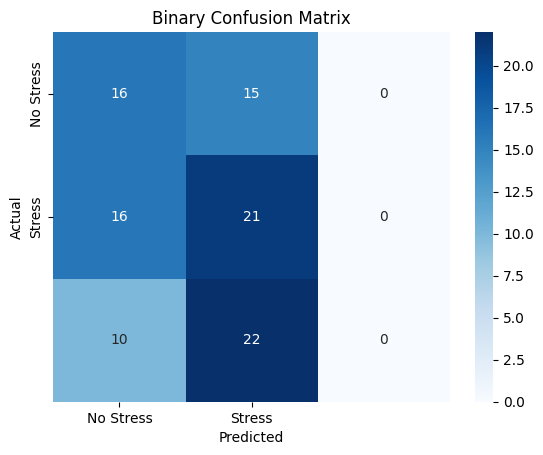


Classification Report:
              precision    recall  f1-score   support

    Baseline      0.333     0.387     0.358        31
   Amusement      0.286     0.270     0.278        37
      Stress      0.310     0.281     0.295        32

    accuracy                          0.310       100
   macro avg      0.310     0.313     0.310       100
weighted avg      0.308     0.310     0.308       100



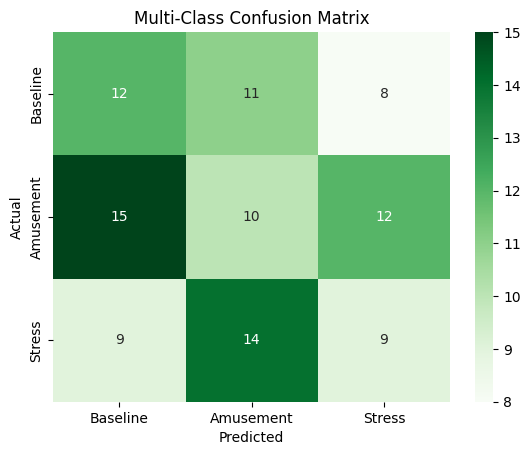

In [46]:
# Binary classification confusion matrix
evaluate_binary(binary_model, val_loader)

# Multi-class classification confusion matrix
evaluate_multiclass(multi_model, val_loader)



In [43]:
# Assume new_data is a [N, 128] tensor
new_data = torch.randn(5, 128).to(device)

# Binary prediction
binary_model.eval()
binary_output = binary_model(new_data)
binary_pred = (binary_output > 0.5).int()
print("Binary Predictions (0=No Stress, 1=Stress):", binary_pred.view(-1).tolist())

# Multi-class prediction
multi_model.eval()
multi_output = multi_model(new_data)
multi_pred = multi_output.argmax(1)
print("Multi-class Predictions (0=Baseline, 1=Amusement, 2=Stress):", multi_pred.tolist())


Binary Predictions (0=No Stress, 1=Stress): [1, 0, 1, 1, 0]
Multi-class Predictions (0=Baseline, 1=Amusement, 2=Stress): [0, 1, 1, 1, 2]
